# Ques5. Use Naive bayes, K-nearest, and Decision tree classification algorithms and buildclassifiers. Divide the data set in to training and test set.
### Compare the accuracy of thedifferent classifiers under the following situations:
#### 5.1 a) Training set = 75% Test set = 25%
#### 5.1 b) Training set = 66.6% (2/3rd of total), Test set = 33.3%
#### 5.2 Training set is chosen by
 ##### i) hold out method
 ##### ii) Random subsampling
##### iii) Cross-Validation. Compare the accuracy of the classifiers obtained.
#### 5.3 Data is scaled to standard format. 

In [1]:
#importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
 
#importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import model_selection

In [2]:
#importing the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

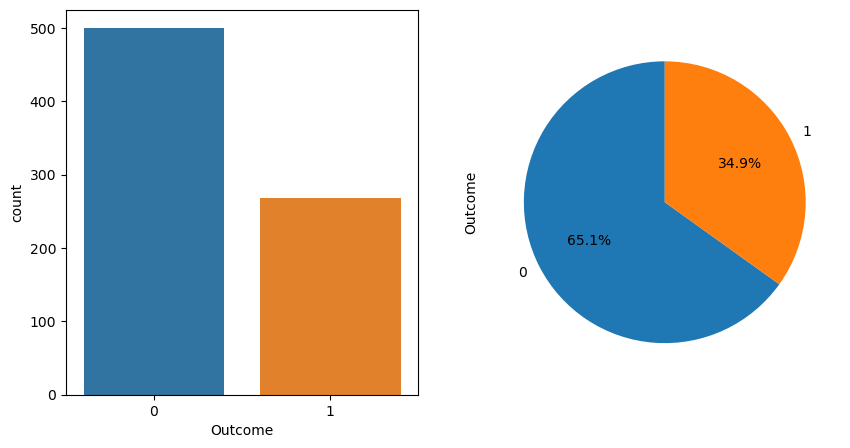

In [5]:

fig = plt.figure(figsize=(10,5))
#1
plt.subplot(1,2,1)
sns.countplot(x = 'Outcome', data = df)
#2
plt.subplot(1,2,2)
df['Outcome'].value_counts().plot.pie(startangle = 90,autopct = '%1.1f%%')
plt.show()


In [6]:
#assigning independent variables to x and dependent variable or response var
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

# 1.Naive Bayers
### 5.1a) Splitting the dataframe into training and testing data in 75:25 ratio

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=25)
gbl = GaussianNB()
gbl.fit(x_train, y_train)
 
y_pred = gbl.predict(x_test)
y_pred
 
print(confusion_matrix(y_test,y_pred))
 
print("Classification report : \n", classification_report(y_test,y_pred))
 
acl = accuracy_score(y_test,y_pred)
print("Accuracy Score:",acl)

[[107  23]
 [ 23  39]]
Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       130
           1       0.63      0.63      0.63        62

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192

Accuracy Score: 0.7604166666666666


### 5.1b) Splitting the dataframe into training and testing data in 66.6:33.3 ratio

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.333, random_state=25)
gb2 = GaussianNB()
gb2.fit(x_train, y_train)
 
y_pred = gb2.predict(x_test)
y_pred
 
print(confusion_matrix(y_test,y_pred))
 
print("Classification report : \n", classification_report(y_test,y_pred))
 
ac2 = accuracy_score(y_test,y_pred)
print("Accuracy Score:",ac2)

[[145  26]
 [ 26  59]]
Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       171
           1       0.69      0.69      0.69        85

    accuracy                           0.80       256
   macro avg       0.77      0.77      0.77       256
weighted avg       0.80      0.80      0.80       256

Accuracy Score: 0.796875


### Comparing accuracy score of 25% and 33.3% split

In [9]:
if acl > ac2:
 print("Test data of 25% data is better")
else:
 print("Test data of 33.3% data is better")

Test data of 33.3% data is better


### 5.2(i) Holdout Method

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=25)
gb3 = GaussianNB()
gb3.fit(x_train, y_train)
 
y_pred = gb3.predict(x_test)
y_pred
 
print(confusion_matrix(y_test,y_pred))
 
print("Classification report : \n", classification_report(y_test,y_pred))
 
ac3 = accuracy_score(y_test,y_pred)
print("Accuracy Score:",ac3)


[[107  23]
 [ 23  39]]
Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       130
           1       0.63      0.63      0.63        62

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192

Accuracy Score: 0.7604166666666666


### 5.2(iii) K Fold Cross Validation

In [11]:
kfold = model_selection.KFold(n_splits =5,random_state=10,shuffle = True)
result = model_selection.cross_val_score(gbl,x_train,y_train,cv = kfold)
print(result)
print("Avg accuracy: {}".format(result.mean()))

[0.70689655 0.80869565 0.74782609 0.7826087  0.76521739]
Avg accuracy: 0.7622488755622189


### Comparing Hold Method and Cross Validation

In [12]:
print("K Fold performs better than cross validation")

K Fold performs better than cross validation


### 5.3 Standard Scaler

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=25)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
gb5 = GaussianNB()
gb5.fit(x_train, y_train)
 
y_pred = gb5.predict(x_test)
y_pred
 
print(confusion_matrix(y_test,y_pred))
 
print("Classification report : \n", classification_report(y_test,y_pred))
 
ac5 = accuracy_score(y_test,y_pred)
print("Accuracy Score:",ac5)

[[87 16]
 [20 31]]
Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       103
           1       0.66      0.61      0.63        51

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

Accuracy Score: 0.7662337662337663


### Comparing Standard Scaler with default parameters

In [14]:
print("Standard Scaler performs better")

Standard Scaler performs better


# KNN Model
### 5.1a) Splitting the dataframe into training and testing data in 75:25 ratio


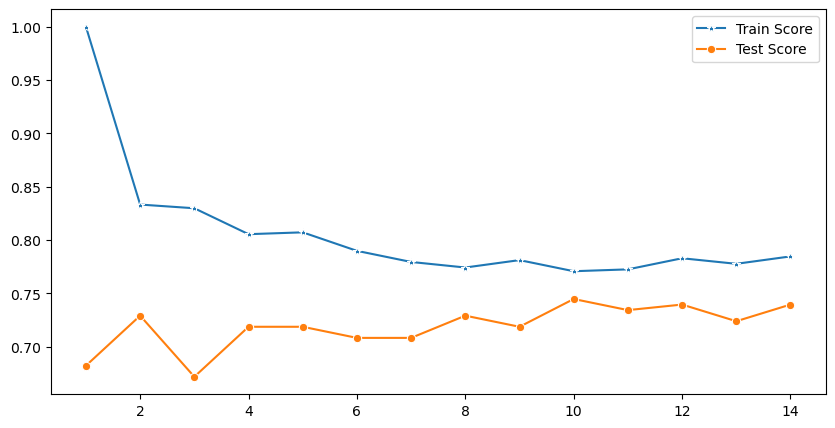

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=25)
test_scores = []
train_scores = []
for i in range(1,15):
 knn = KNeighborsClassifier(i)
 knn.fit(x_train,y_train)
 
 train_scores.append(knn.score(x_train,y_train))
 test_scores.append(knn.score(x_test,y_test))
plt.figure(figsize = (10,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [16]:
k1 = KNeighborsClassifier(n_neighbors = 11)
k1.fit(x_train,y_train)
y_pred = k1.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Classification report : \n", classification_report(y_test,y_pred))
acl = accuracy_score(y_test,y_pred)
print("Accuracy Score:",acl)

[[110  20]
 [ 31  31]]
Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       130
           1       0.61      0.50      0.55        62

    accuracy                           0.73       192
   macro avg       0.69      0.67      0.68       192
weighted avg       0.72      0.73      0.73       192

Accuracy Score: 0.734375


### 5.1b) Splitting the dataframe into training and testing data in 66.6:33.3ratio

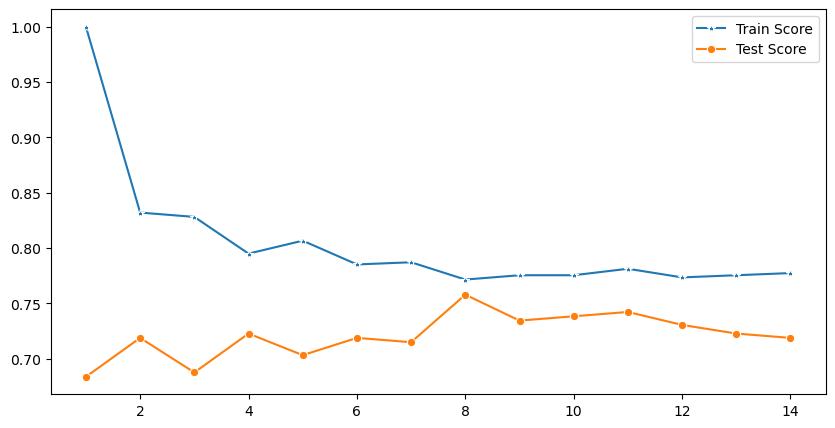

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.333, random_state=25)
test_scores = []
train_scores = []
for i in range(1,15):
 knn = KNeighborsClassifier(i)
 knn.fit(x_train,y_train)
 
 train_scores.append(knn.score(x_train,y_train))
 test_scores.append(knn.score(x_test,y_test))
plt.figure(figsize = (10,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [18]:
k2 = KNeighborsClassifier(n_neighbors = 9)
k2.fit(x_train,y_train)
y_pred = k2.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Classification report : \n", classification_report(y_test,y_pred))
ac2 = accuracy_score(y_test,y_pred)
print("Accuracy Score:",ac2)

[[144  27]
 [ 41  44]]
Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       171
           1       0.62      0.52      0.56        85

    accuracy                           0.73       256
   macro avg       0.70      0.68      0.69       256
weighted avg       0.73      0.73      0.73       256

Accuracy Score: 0.734375


### Comparing accuracy score of 25% and 33.3% split

In [19]:
if acl > ac2:
 print("Test data of 25% data is better")
else:
 print("Test data of 33.3% data is better")

Test data of 33.3% data is better


### 5.2(i) Holdout Method

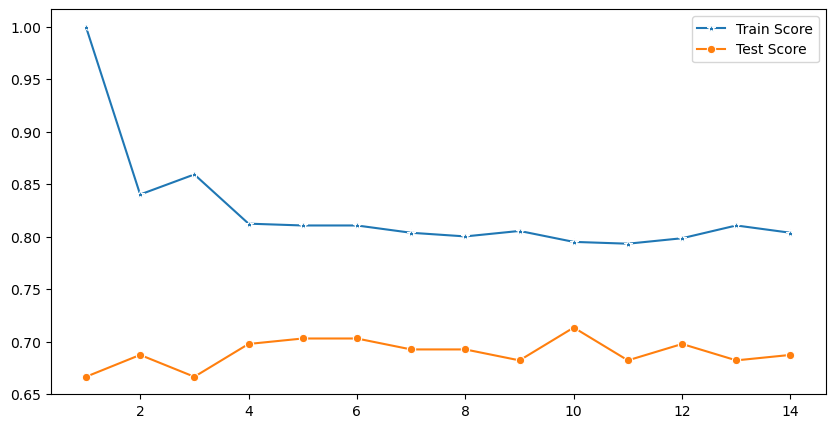

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=10)
test_scores = []
train_scores = []
for i in range(1,15):
 knn = KNeighborsClassifier(i)
 knn.fit(x_train,y_train)
 
 train_scores.append(knn.score(x_train,y_train))
 test_scores.append(knn.score(x_test,y_test))
plt.figure(figsize = (10,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [21]:
k3 = KNeighborsClassifier(n_neighbors = 9)
k3.fit(x_train,y_train)
y_pred = k3.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Classification report : \n", classification_report(y_test,y_pred))
ac3 = accuracy_score(y_test,y_pred)
print("Accuracy Score:",ac3)

[[100  21]
 [ 40  31]]
Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77       121
           1       0.60      0.44      0.50        71

    accuracy                           0.68       192
   macro avg       0.66      0.63      0.64       192
weighted avg       0.67      0.68      0.67       192

Accuracy Score: 0.6822916666666666


### 5.2(iii) K Fold Cross Validation

In [22]:
print("K Fold performs better than cross validation")

K Fold performs better than cross validation


### 5.3 Standard Scaler

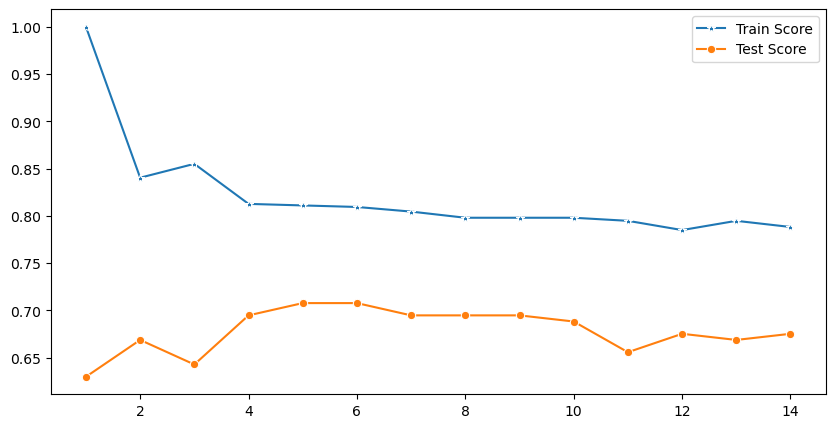

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=10)
test_scores = []
train_scores = []
for i in range(1,15):
 knn = KNeighborsClassifier(i)
 knn.fit(x_train,y_train)
 
 train_scores.append(knn.score(x_train,y_train))
 test_scores.append(knn.score(x_test,y_test))
plt.figure(figsize = (10,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [24]:
k5 = KNeighborsClassifier(n_neighbors = 9)
k5.fit(x_train,y_train)
y_pred = k5.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Classification report : \n", classification_report(y_test,y_pred))
ac5 = accuracy_score(y_test,y_pred)
print("Accuracy Score:",ac5)

[[78 17]
 [30 29]]
Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        95
           1       0.63      0.49      0.55        59

    accuracy                           0.69       154
   macro avg       0.68      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154

Accuracy Score: 0.6948051948051948


### Comparing Standard Scaler with default parameters

In [25]:
print("Standard Scaler performs better")

Standard Scaler performs better


# 2.Decision Tree
### 5.1a) Splitting the dataframe into training and testing data in 75:25 ratio

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=25)
dt1 = DecisionTreeClassifier()
dt1.fit(x_train, y_train)
 
y_pred = dt1.predict(x_test)
y_pred
 
print(confusion_matrix(y_test,y_pred))
 
print("Classification report : \n", classification_report(y_test,y_pred))
 
ac1 = accuracy_score(y_test,y_pred)
print("Accuracy Score:",ac1)

[[104  26]
 [ 31  31]]
Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       130
           1       0.54      0.50      0.52        62

    accuracy                           0.70       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.70      0.70      0.70       192

Accuracy Score: 0.703125


### 5.1(b) Splitting the dataframe into training and testing data in 66.6:33.3 ratio

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.333, random_state=25)
dt2 = DecisionTreeClassifier()
dt2.fit(x_train, y_train)
 
y_pred = dt2.predict(x_test)
y_pred
 
print(confusion_matrix(y_test,y_pred))
 
print("Classification report : \n", classification_report(y_test,y_pred))
 
ac2 = accuracy_score(y_test,y_pred)
print("Accuracy Score:",ac2)


[[130  41]
 [ 37  48]]
Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       171
           1       0.54      0.56      0.55        85

    accuracy                           0.70       256
   macro avg       0.66      0.66      0.66       256
weighted avg       0.70      0.70      0.70       256

Accuracy Score: 0.6953125


### Comparing accuracy score of 25% and 33.3% split

In [28]:
if acl > ac2:
 print("Test data of 25% data is better")
else:
 print("Test data of 33.3% data is better")

Test data of 25% data is better


### 5.2(i) Holdout Method

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=25)
dt3 = DecisionTreeClassifier()
dt3.fit(x_train, y_train)
 
y_pred = dt3.predict(x_test)
y_pred
 
print(confusion_matrix(y_test,y_pred))
 
print("Classification report : \n", classification_report(y_test,y_pred))
 
ac3 = accuracy_score(y_test,y_pred)
print("Accuracy Score:",ac3)

[[101  29]
 [ 30  32]]
Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       130
           1       0.52      0.52      0.52        62

    accuracy                           0.69       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.69      0.69      0.69       192

Accuracy Score: 0.6927083333333334


### 5.2(iii) K Fold Cross Validation

In [30]:
kfold = model_selection.KFold(n_splits = 5,random_state = 10,shuffle = True)
result = model_selection.cross_val_score(gbl,x_train,y_train,cv = kfold)
print(result)
print("Avg accuracy: {}".format(result.mean()))

[0.70689655 0.80869565 0.74782609 0.7826087  0.76521739]
Avg accuracy: 0.7622488755622189


### Comparing Hold Method and Cross Validation

In [31]:
print("K Fold performs better than cross validation")

K Fold performs better than cross validation


### 5.3 Standard Scaler

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=25)
dt5 = DecisionTreeClassifier()
dt5.fit(x_train, y_train)
 
y_pred = dt5.predict(x_test)
y_pred
 
print(confusion_matrix(y_test,y_pred))
 
print("Classification report : \n", classification_report(y_test,y_pred))
 
ac5 = accuracy_score(y_test,y_pred)
print("Accuracy Score:",ac5)

[[81 22]
 [27 24]]
Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       103
           1       0.52      0.47      0.49        51

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.68       154

Accuracy Score: 0.6818181818181818


### Comparing Standard Scaler with default parameters

In [33]:
print("Standard Scaler performs better ")

Standard Scaler performs better 
